# Исследование о перспективах игровой индустрии на 2017 год.

Сегодня мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Перед нами данные об играх до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Наш план на это исследование:
Изучить поверхностно данные

Сделать предобработку данных

Добавить в таблицу новые столбцы для дальнейшего анализа

Найти факторы, влиящие на потенциально популярный продукт и спланировать рекламные кампании.(методом проверки гипотез)

Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### Откроем файл с данными и изучите общую информацию. 

**Импортируем библиотеку pandas. Считываем данные из csv-файла в датафрейм и сохраняем в переменную data.** 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
dff=pd.read_csv('/datasets/games.csv')

**Выведем первые 20 строчек таблицы для ознакомления.**

In [4]:
dff.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Заметим, что есть пропуски во многих столбцах, но где их процент меньше 5 от общих данных, мы просто удалим эти строки.*
*А также мы видно, что оценка пользователей записана в строковом формате, а не числовом.*

**Выведем основную информацию о датафрейме с помощью метода `describe()`.**

In [6]:
dff.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Построим гистограмы для всех столбцов таблицы для всех столбцов таблицы.**

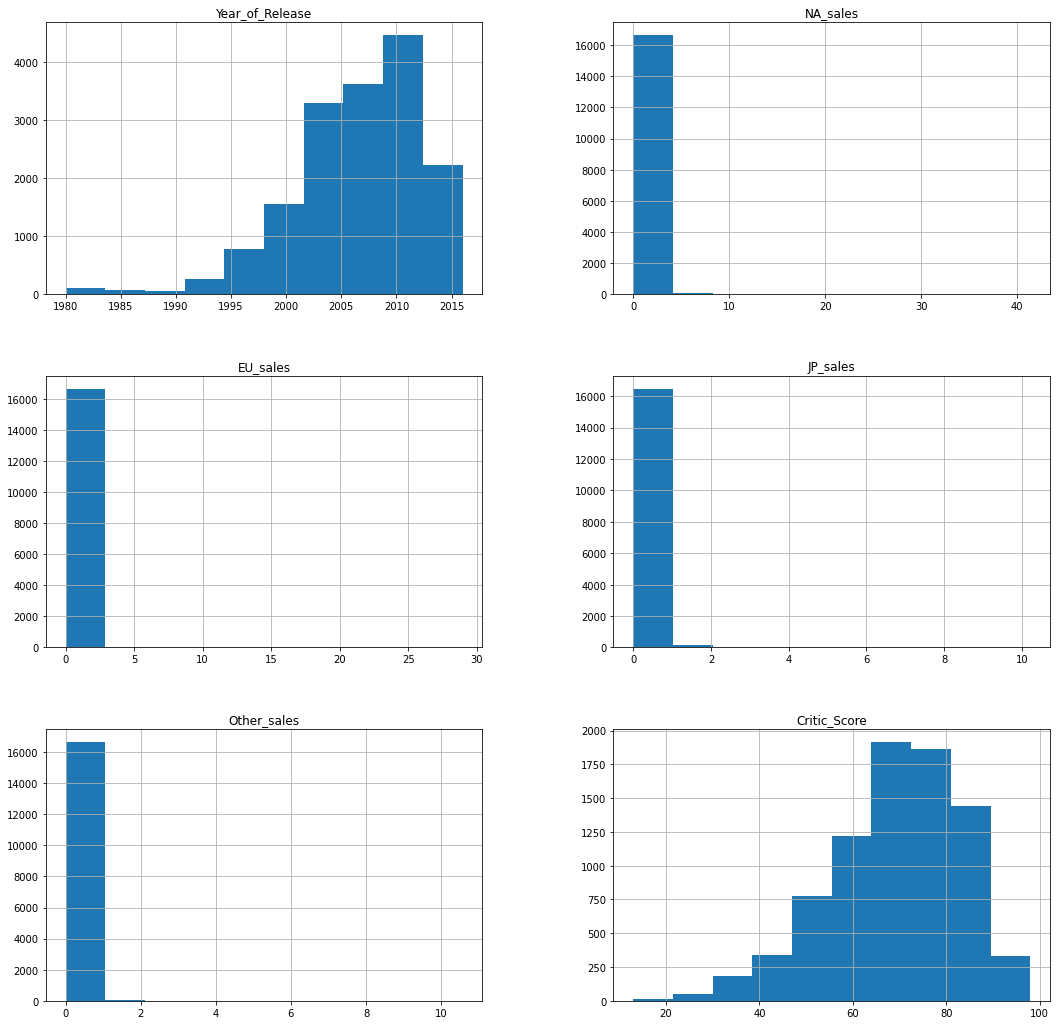

In [7]:
dff.hist(figsize=(18,18))
plt.show()

*До 1990-ых годов количество выпущенных игр слишком мало, поэтому в дальнейшем возьмем временной интервал более свежий.*

**Мы поверхностно изучили данные, но уже смогли оценить наши данные, и они неидеальны, в них есть как пропуски, так и неверные типы данных. Займемся исправлением этого в следующих главах.**

### Предобработка данных

**Переименуем название столбцов на нижний регистр.**

In [8]:
dff.columns = ['name', 'platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']               


In [9]:
dff.columns = dff.columns.str.lower()

проверим результат изменения

In [10]:
dff.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Выведем количество пропущенных значений для каждого столбца.**

In [11]:
dff.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

удалим те строки, в чьих столбцах  пропуски встречаются менее 5% от общего объема.

In [12]:
dff=dff.dropna(subset=['name', 'genre','year_of_release'])

проверим, удалились ли те самые строки.

In [13]:
dff.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [14]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Заметим, что оценку пользователях точно нужно переводить из строкового формата в числовой.  

При замене в строке 'user_score' нам вылезла ошибка, так как там среди значений было 'tbd', удалим все строки с этим значением и повторим попытку смены типа данных.

комментарий для исправления ошибки с tbd

**Я исправлю сначала 'tbd' в столбце user_score на -5, чтобы потом поменять это на медианное значение по всем играм.**

In [15]:
dff['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
dff['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
dff.loc[(dff.user_score == 'tbd'), 'user_score'] = None

In [18]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [19]:
dff['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', None, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
dff['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', None, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
dff['user_score'] = dff['user_score'].astype('float')

In [23]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Отлично, мы привели данные к нужны типам.

Касательно других пропусков, я могу сказать, что оценки критиков и пользователей трогать точно не стоит, так как каждая отдельная игра имеет разное качество независимо от жанра, года выпуска и прочего, а вот что касается столбца rating, то тут уже можно ориентироваться на жанр игры.Например спортивная игра не должна попадать в категорию для взрослых.

In [24]:
dff['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [25]:
dff['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

На данный момент из-за большого варианта категорий и жанром, мне тяжело заполнить пропуски в столбце с категориями, поэтому оставим как есть.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец для.

In [26]:
dff['world_sales']=dff['na_sales']+dff['eu_sales']+dff['jp_sales']+dff['other_sales']

Взглянем на нашу таблицу после предобработки.

In [27]:
dff.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### исследовательский анализ данных.

Посмотрим, сколько игр производилось в каждый год.

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

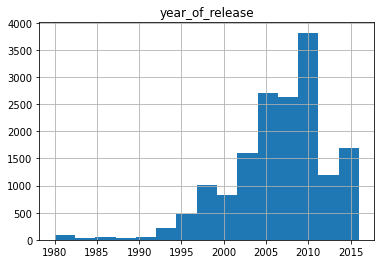

In [28]:
dff.hist('year_of_release',bins=15)

По гистограмме видно, что количество игр, выпущенное до 1995 года слишком низкое, и врядли пригодятся на для дальнейшего анализа, поэтому предлагаю оставить выборку с 1995 года и по наш день.

In [29]:
dff=dff.query('year_of_release >= 1995')

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

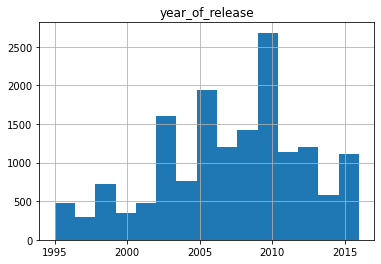

In [30]:
dff.hist('year_of_release',bins=15)

In [31]:
top=dff.groupby('platform')['name'].count().sort_values(ascending=False).head(10)

In [32]:
top

platform
PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1173
PC       944
GBA      811
XB       803
Name: name, dtype: int64

Создадим список из самых популярных приставок

In [33]:
areas=top.index.unique()

Импортируем библиотеку matplotlib.pyplot, для создание гистограм с распределением продаж для каждой популярной платформы

In [34]:
import matplotlib.pyplot as plt

In [35]:
def prtop():
    for i in areas:
        dff[dff['platform']==i].hist('year_of_release',bins=8)
        plt.xlabel(i)

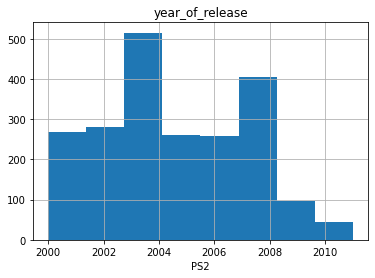

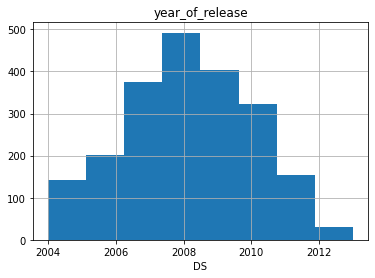

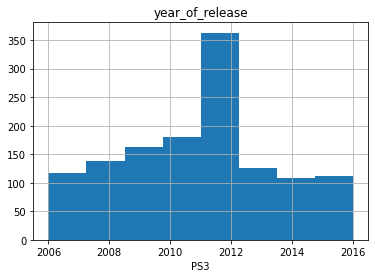

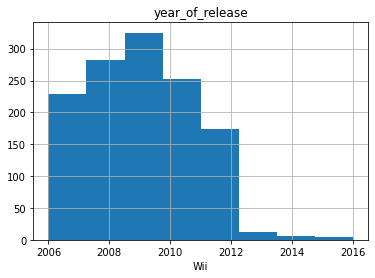

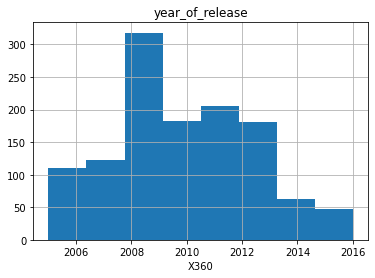

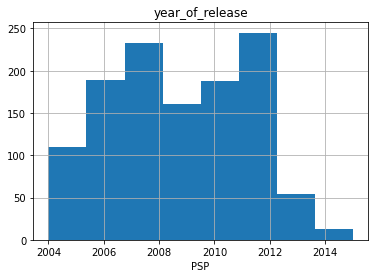

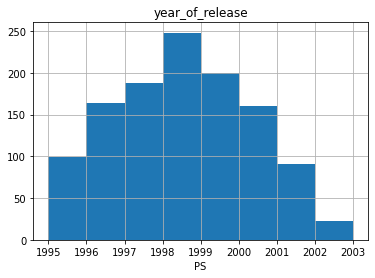

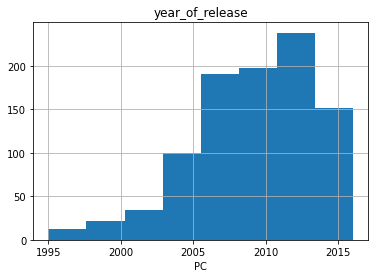

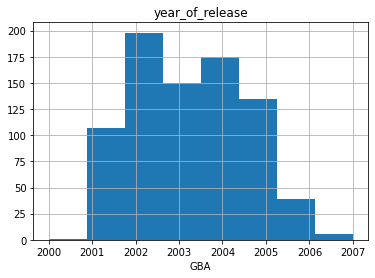

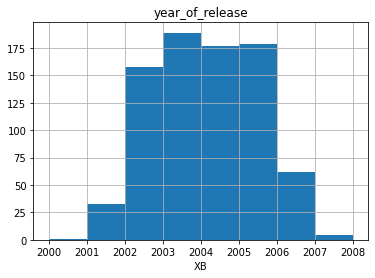

In [36]:
prtop()

Можно заметить,что в среднем для каждой игровой приставки покупают игры на протяжении 8 лет, однако пользователи ПК покупают игры с 1995 года по нынешний день.

Для прогноза на 2017 год я планирую брать данные из нашего датафрейма за последнии 8 лет, чтобы проанализировать продажи только на актуальных приставках. Создадим новую таблицу modern

In [37]:
modern=dff.query('year_of_release>2012')

In [38]:
popular=modern.groupby('platform')['name'].count().sort_values(ascending=False)

In [39]:
popular

platform
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: name, dtype: int64

In [40]:
spisok=popular.index.unique()

In [41]:
def prpop():
    for i in spisok:
        modern[modern['platform']==i].hist('year_of_release')
        plt.xlabel(i)

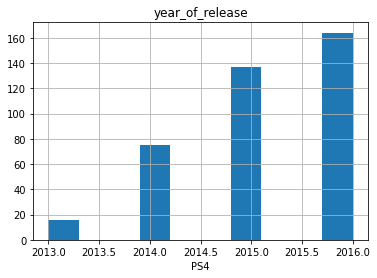

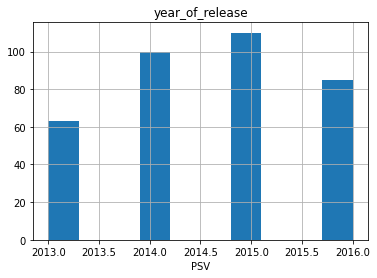

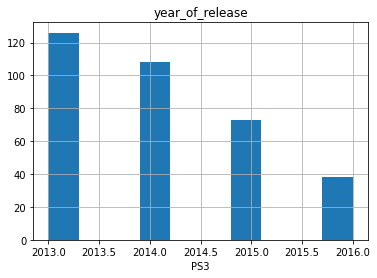

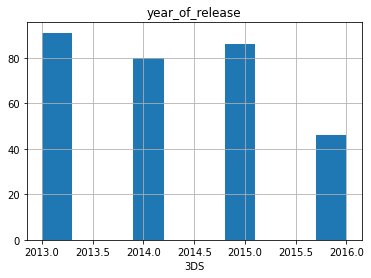

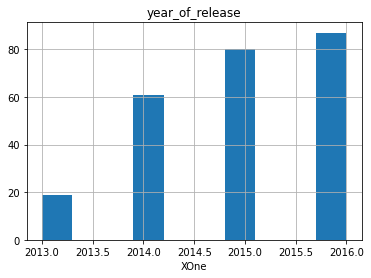

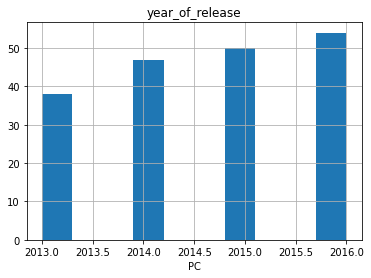

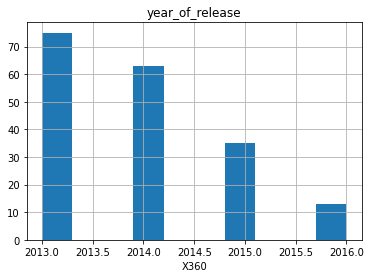

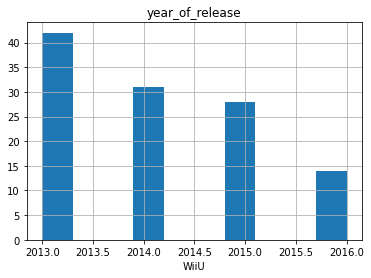

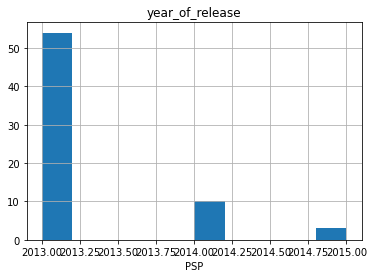

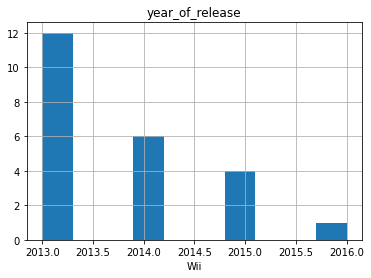

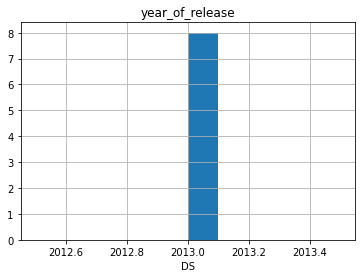

In [42]:
prpop()

можно заметить, что большая часть приставок уже неактуальна, и продажи катятся вниз с каждым годом(либо вообще их нет за поледнее время). Там где видна положительная тенденция, будем считать эти приставки актуальными и выпишем их в отдельный список. К таким относятся:'3DS','PC','PSV','PS4','XOne'.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

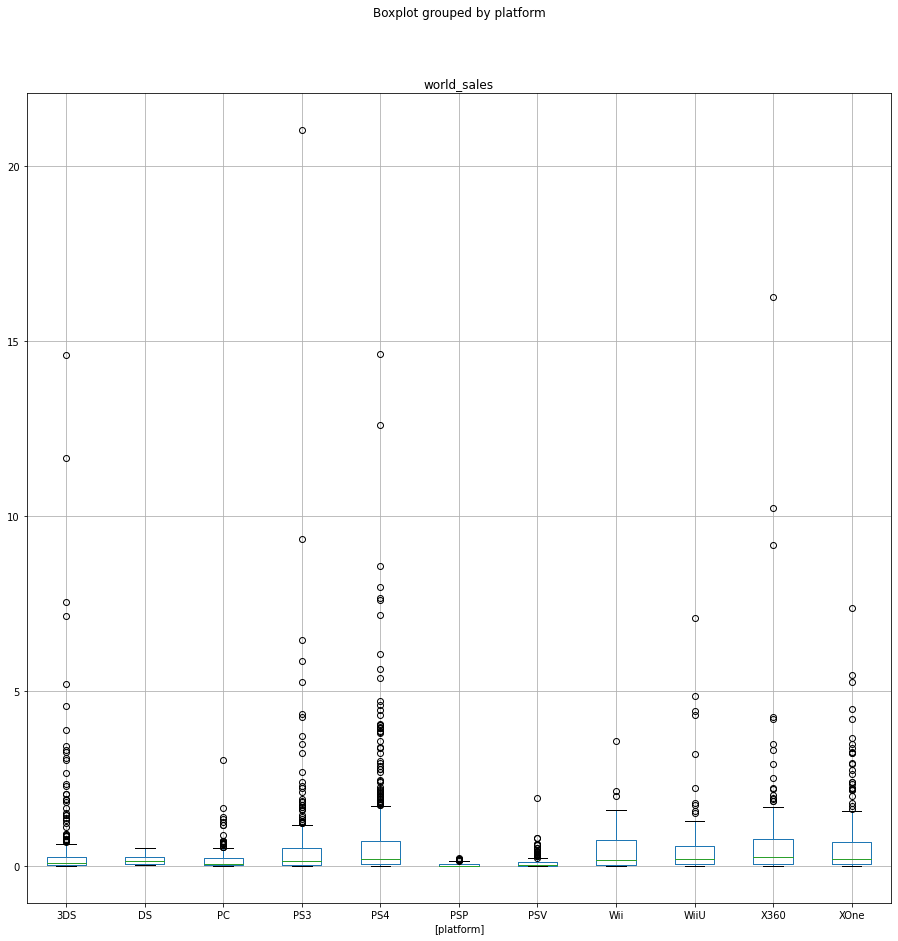

In [43]:
boxplot = modern.boxplot(column=['world_sales'], by = ['platform'],figsize=(15,15))

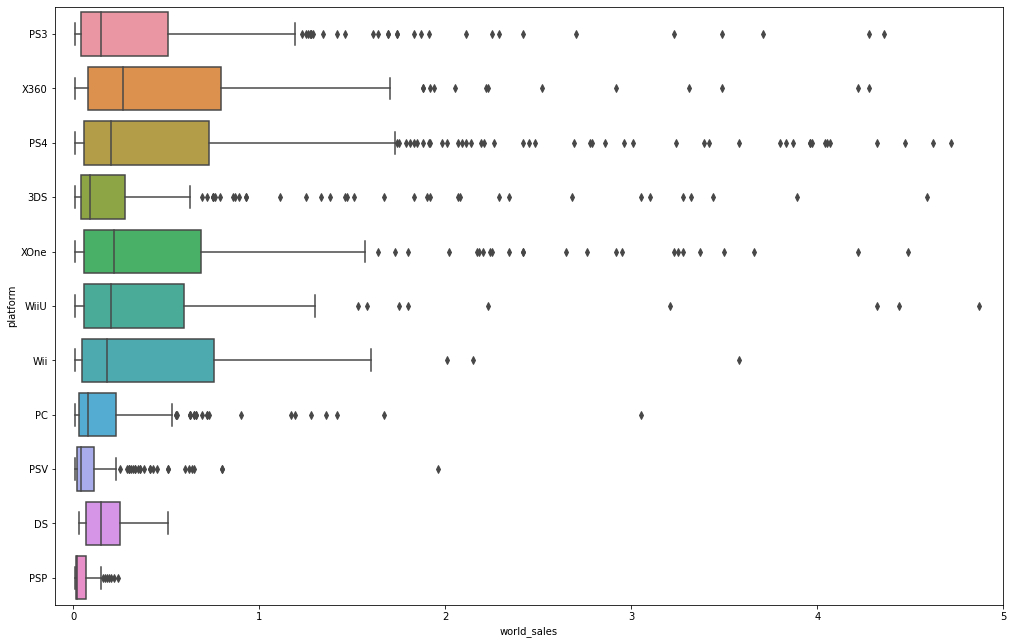

In [44]:
# код ревьюера

import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=modern, y='platform', x='world_sales')
plt.xlim(-0.1, 5)
plt.show()

Посмотрим, для каких платформ за последние 8 лет выпускались игры.

In [45]:
modern.groupby('platform')['world_sales'].sum()

platform
3DS     143.25
DS        1.54
PC       39.43
PS3     181.43
PS4     314.14
PSP       3.50
PSV      32.99
Wii      13.66
WiiU     64.63
X360    136.80
XOne    159.32
Name: world_sales, dtype: float64

In [46]:
modern.groupby('platform')['world_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


По количеству игр, среднему числу продаж по каждой игре, количествам выбросов(тоесть очень успешных и популярным играм), а самое главное актуальность платформы, лидируют PS4 и XOne. Предыдущие модели этих приставок(PS3 и X360 соответственно) показывали очень хороший спрос на игры, однако их время подходит к концу, а их старшие версии отлично подходят для инвестирования в игры данных приставок.

Создадим таблицу только из строк PS4, для того, чтобы посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайем корреляцию между отзывами и продажами.

In [47]:
ps4=modern.query('platform=="PS4"')

In [48]:
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    float64
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           255 non-null    object 
 11  world_sales      392 non-null    float64
dtypes: float64(8), object(4)
memory usage: 39.8+ KB


In [49]:
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [50]:
new_ps4=ps4[['critic_score','user_score','world_sales']]

Построим матрицу диаграмм рассеяния, которые покажут зависимость продаж от указанных выше параметров.

array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='world_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='world_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='world_sales', ylabel='world_sales'>]],
      dtype=object)

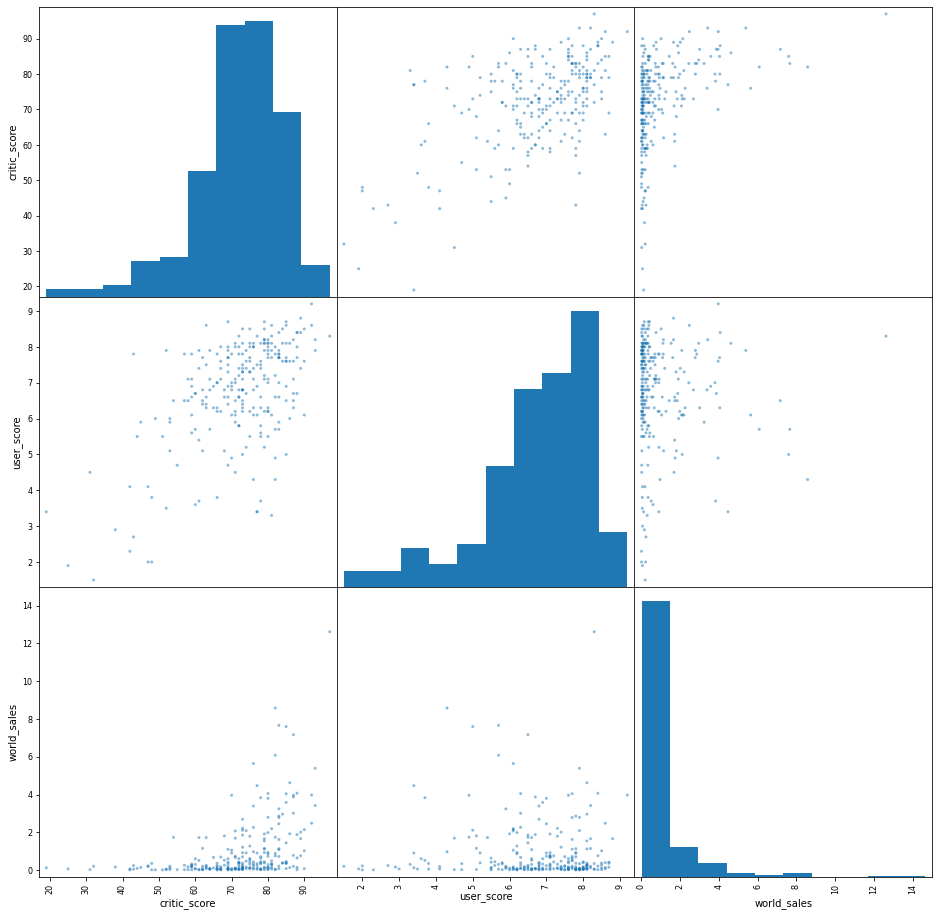

In [51]:
pd.plotting.scatter_matrix(new_ps4, figsize=(16, 16)) 

**В последней строке находится диаграмма рассеивания цены к остальным критериям.**

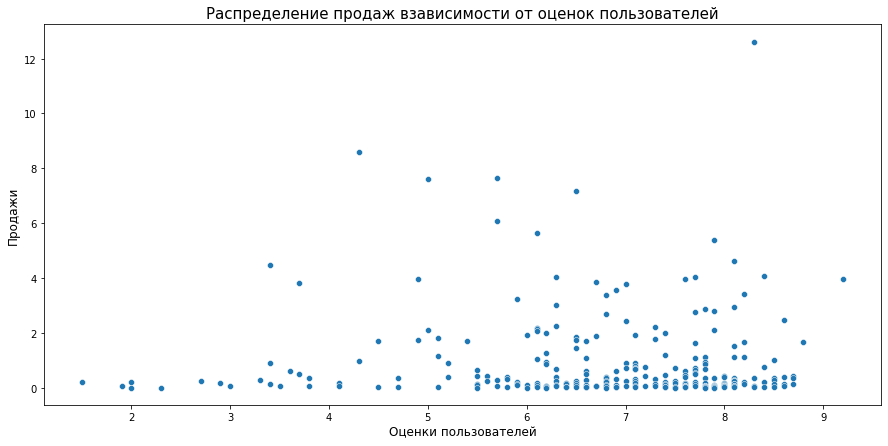

In [52]:
# код ревьюера

plt.figure(figsize=(15, 7))
sns.scatterplot(data=ps4, x='user_score', y='world_sales')

plt.title('Распределение продаж взависимости от оценок пользователей', size=15)
plt.xlabel('Оценки пользователей', size=12)
plt.ylabel('Продажи', size=12)

plt.show()

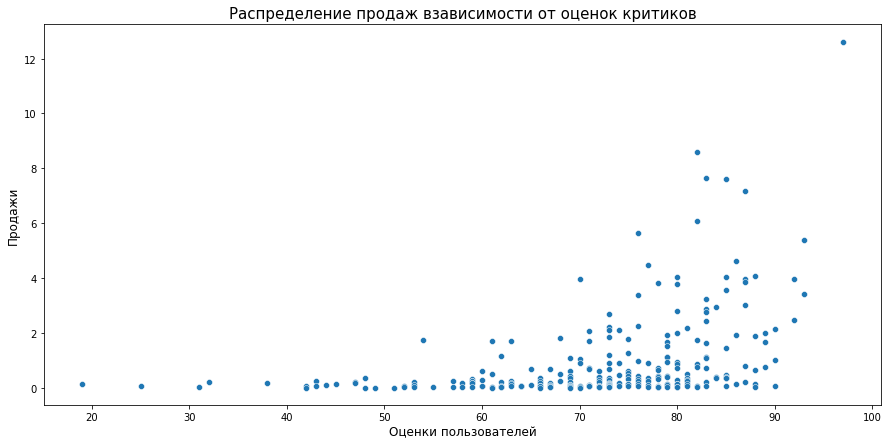

In [53]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=ps4, x='critic_score', y='world_sales')

plt.title('Распределение продаж взависимости от оценок критиков', size=15)
plt.xlabel('Оценки пользователей', size=12)
plt.ylabel('Продажи', size=12)

plt.show()

**Посчитаем коэффициент корреляции.**

In [54]:
new_ps4.corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
world_sales,0.406568,-0.031957,1.000000


Можно заметить, что на мировые продажи имеет влияние оценка критиков, в то время как оценка пользователя не имеет никакой взаимосвязи с продажами игр.

Проверим это предположение на предыдущей версии приставки от Sony, а так же на их главном конкуренте Xbox:

In [55]:
ps3=modern.query('platform=="PS3"')

In [56]:
new_ps3=ps3[['critic_score','user_score','world_sales']]

In [57]:
new_ps3.corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
world_sales,0.334285,0.002394,1.000000


In [58]:
XOne=modern.query('platform=="XOne"')

In [59]:
new_XOne=XOne[['critic_score','user_score','world_sales']]

In [60]:
new_XOne.corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
world_sales,0.416998,-0.068925,1.000000


**Да,наше предположение подтвердилось, для продажи игр, следует смотреть на отзывы критиков, нежели пользователей.**

Посмотрите на общее распределение игр по жанрам.

In [61]:
modern.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

In [62]:
modern.groupby('genre')['world_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: world_sales, dtype: float64

In [63]:
modern.groupby('genre')['world_sales'].agg(['count', 'mean']).sort_values('count',ascending=False)  

,count,mean
genre,,
Action,766,0.420196
Role-Playing,292,0.499623
Adventure,245,0.096490
Sports,214,0.703972
Shooter,187,1.245882
Misc,155,0.405290
Racing,85,0.469294
Fighting,80,0.441375
Platform,74,0.576081


Лидером среди жанров является Action, однако по средним продажам каждого жанра, не входит даже в топ-5. Хорошее соотношение по количеству игр и их продажам показывают Sports и Shooter.У игр в стиле Adventure при огромном ассортиментеигр, число продаж очень низко. Однако есть и полная противоположность в виде Platform, где количество игр невелико, зато продажи достаточно впечатляющие(в среднем более миллиона продаж на каждую игру этого жанра).

### Составление портрета пользователя каждого региона

В этой главе я хочу посмотреть, как меняются предпочтения в разных регионах планеты

Сначала посмотрим на топ 5 жанров в каждом из регионов:

<AxesSubplot:title={'center':'ТОП 5 жанров в Северной Америке'}, ylabel='na_sales'>

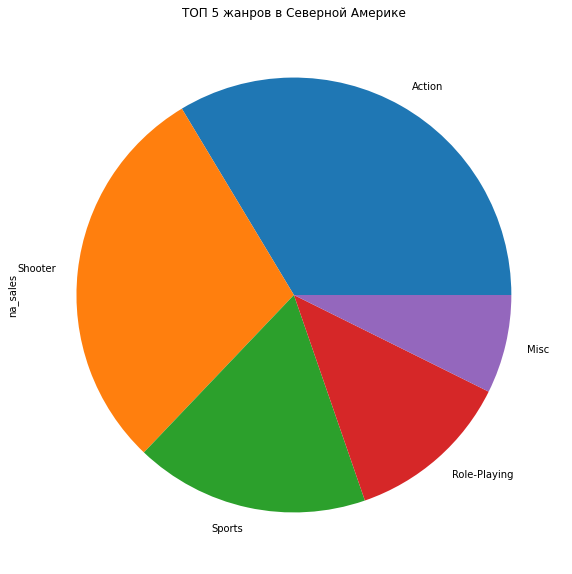

In [64]:
modern.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind='pie', grid=True, title='ТОП 5 жанров в Северной Америке', figsize=(10, 10))

Топ-5 жанров по количеству игр для Северной Америки.

In [65]:
modern.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Сделаем также для Европы и Японии.

<AxesSubplot:title={'center':'ТОП 5 жанров в Европе'}, ylabel='eu_sales'>

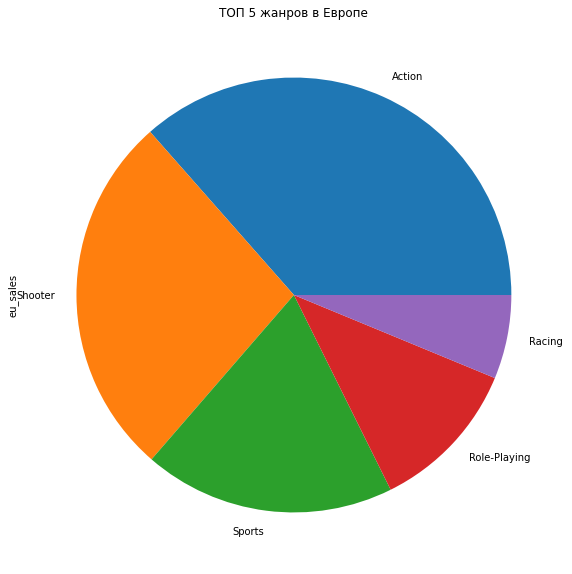

In [66]:
modern.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind='pie', grid=True, title='ТОП 5 жанров в Европе', figsize=(10, 10))

Топ-5 жанров по количеству игр для Европы.

In [67]:
modern.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'ТОП 5 жанров в Японии'}, ylabel='jp_sales'>

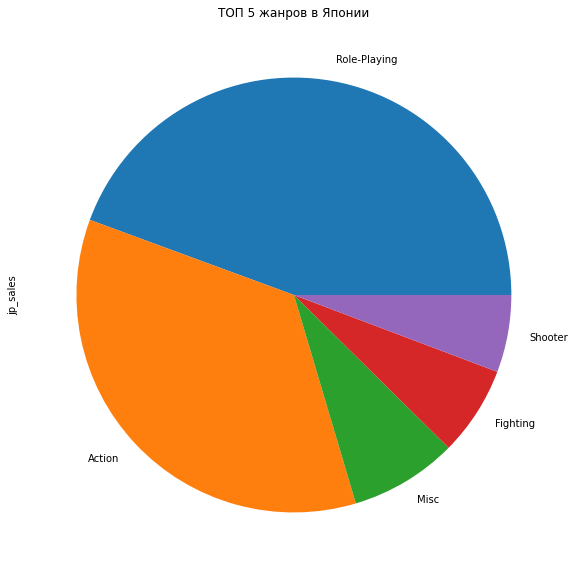

In [68]:
modern.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind='pie', grid=True, title='ТОП 5 жанров в Японии', figsize=(10, 10))

Топ-5 жанров по количеству игр для Японии.

In [69]:
modern.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

Удивительно, но рынок в Европе и Северной Америки идентичны по жанрам игр, однако в Японии совершенно другая картина, здесь жанр Role-Playing слишком востребован, хотя в других районах он не попал даже в топ-3 с большим отрывом.

Посмотрим теперь на то, какие платформы пользуются актуальностью в каждом регионе.

<AxesSubplot:title={'center':'ТОП 5 платформ в Северной Америке'}, ylabel='na_sales'>

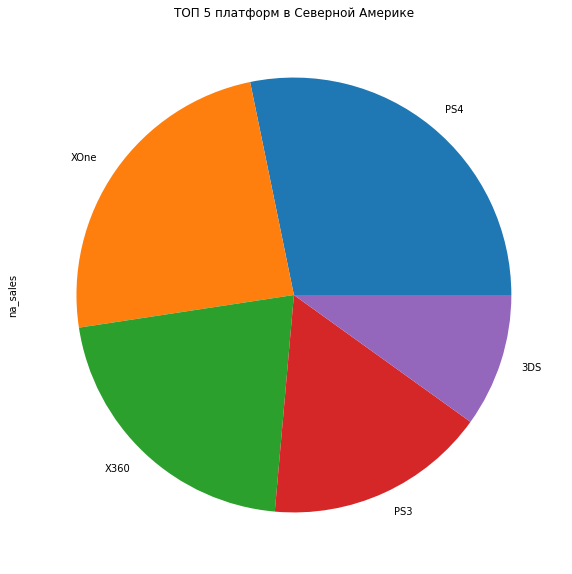

In [70]:
modern.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind='pie', grid=True, title='ТОП 5 платформ в Северной Америке', figsize=(10, 10))

Топ-5 платформ по количеству игр для Северной Америки.

In [71]:
modern.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'ТОП 5 платформ в Европе'}, ylabel='eu_sales'>

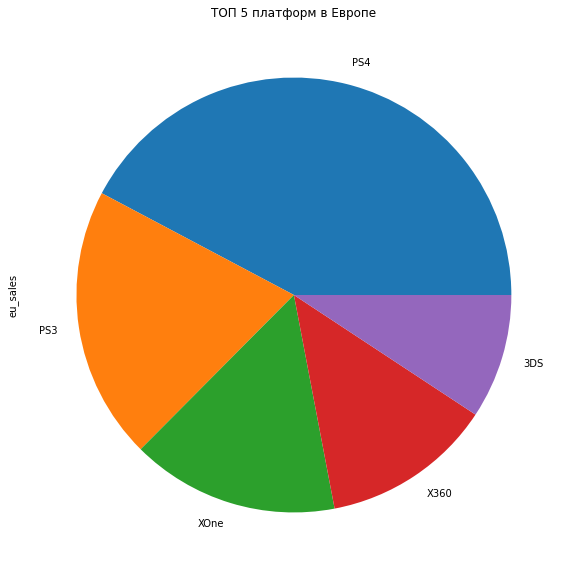

In [72]:
modern.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind='pie', grid=True, title='ТОП 5 платформ в Европе', figsize=(10, 10))

Топ-5 платформ по количеству игр для Европы.

In [73]:
modern.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'ТОП 5 платформ в Японии'}, ylabel='jp_sales'>

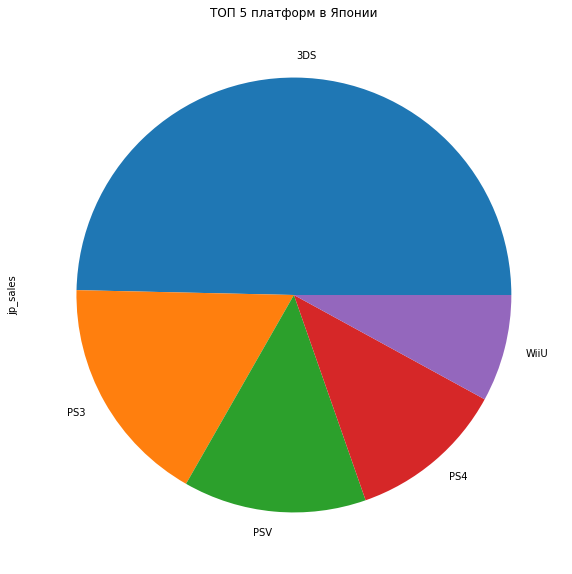

In [74]:
modern.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(
    kind='pie', grid=True, title='ТОП 5 платформ в Японии', figsize=(10, 10))

Топ-5 платформ по количеству игр для Японии.

In [75]:
modern.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Здесь ситуация похожая, Европа и Северная имеют похожие платформы для игр(у Америки выделяется больше Xbox, так как они являются страной производителем), у Японии акцент в основном идет на Nintendo, что и не удивительно, т.к. страной производителем и является Япония 

Последнее, в чем я хочу сравнить регионы, так это по самым популярным категориям игр, которые покупают в каждой части мира

Сначала посмотрим, какие категории игр вообще есть:

In [76]:
modern.groupby('rating')['world_sales'].sum().sort_values(ascending=False)

rating
M       371.68
E       200.16
T       126.62
E10+    115.39
Name: world_sales, dtype: float64

Оказалось, что всего 5 категорий, но RP мы рассматривать не будем, так как это единичный случай, который не влияет на общую картину. Расположим категории по возрастанию, где первая категория для детей, а последняя уже только 18+. Вот как они выглядят:
- E
- E10+
- T
- M

<AxesSubplot:title={'center':'ТОП 5 категорий в Северной Америке'}, ylabel='na_sales'>

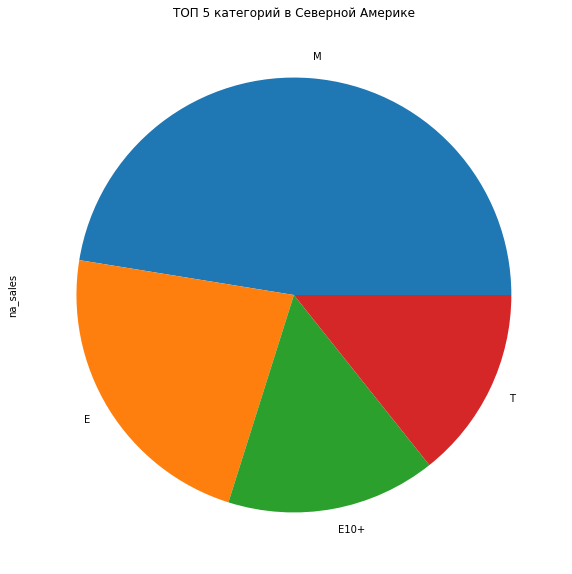

In [77]:
modern.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(4).plot(
    kind='pie', grid=True, title='ТОП 5 категорий в Северной Америке', figsize=(10, 10))

Топ-4 категорий по количеству игр для Северной Америки.

In [78]:
modern.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)

rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'ТОП 5 категорий в Европе'}, ylabel='eu_sales'>

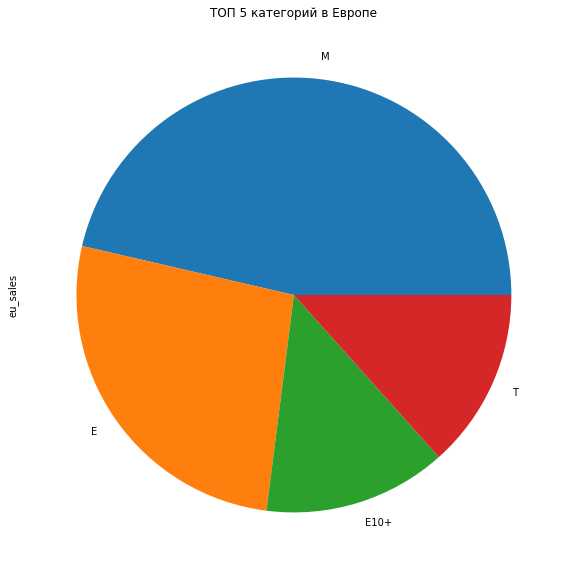

In [79]:
modern.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(4).plot(
    kind='pie', grid=True, title='ТОП 5 категорий в Европе', figsize=(10, 10))

Топ-4 категорий по количеству игр для Европы.

In [80]:
modern.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)

rating
M       145.32
E        83.36
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'ТОП 5 категорий в Японии'}, ylabel='jp_sales'>

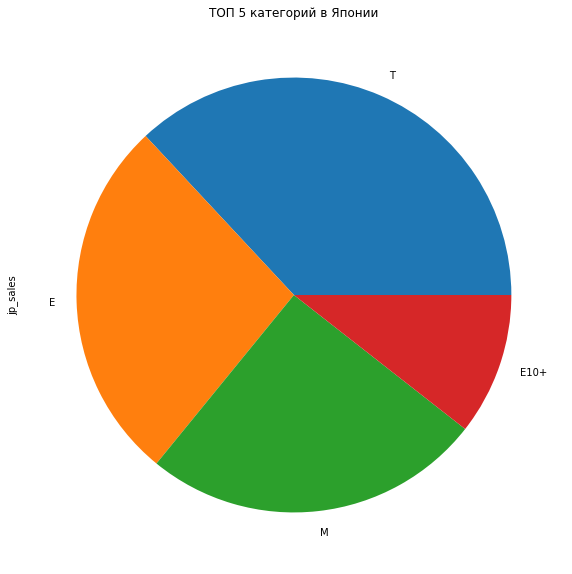

In [81]:
modern.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(4).plot(
    kind='pie', grid=True, title='ТОП 5 категорий в Японии', figsize=(10, 10))

Топ-4 категорий по количеству игр для Японии.

In [82]:
modern.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

rating
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

Картина повторилась, категории для европы и Северной америки почти идентичны-лидируют игры для взрослых, в то время как в Японии, игры для детей являются в приоритете.

**Нам удалось сравнить пользователей каждого региона, и мы установили, что Европа и Северна Америка очень схожи друг с другом, в то время Япония выделяется в каждом сравнении. Если в Японии пользователи предпочитают играть на ручной платформе от nintendo в детские игры, то в других регионах распространено играть на плазме в более взрослые игры.**

### Проверка гипотез.

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Рейтинг пользователей (user_score) "XOne" = рейтинг пользователей (user_score) "PC"`
H_a: Рейтинг пользователей (user_score) "XOne" ≠ рейтинг пользователей (user_score) "PC"`
alpha = 0.05
```



Из библиотеки scipy импортируем статистику, а также создадим новую таблицу, в которой уберем пропуски в столбце пользовательских оценок:

In [83]:
modern1=modern.dropna(subset=['user_score'])

In [84]:
from scipy import stats as st

In [85]:
# results = вызов метода для проверки гипотезы
sample_1=modern1[modern['platform'] =='XOne']['user_score']
sample_2=modern1[modern['platform'] =='PC']['user_score']
#Установим уровень статистической значимости в 5%
alpha=0.05
results = st.ttest_ind(
    sample_1, 
    sample_2,equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


/tmp/ipykernel_261/1176122679.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_1=modern1[modern['platform'] =='XOne']['user_score']
/tmp/ipykernel_261/1176122679.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_2=modern1[modern['platform'] =='PC']['user_score']


Первая гипотеза подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные,но за нулевую гипотещу возьмем то, что они равны;

```
H_0: Рейтинг пользователей (user_score) "Action" = рейтинг пользователей (user_score) "Sports"`
H_a: Рейтинг пользователей (user_score) "Action" ≠ рейтинг пользователей (user_score) "Sports"`
alpha = 0.05
```


In [86]:
# results = вызов метода для проверки гипотезы
sample_1=modern1[modern['genre'] =='Action']['user_score']
sample_2=modern1[modern['genre'] =='Sports']['user_score']
#Установим уровень статистической значимости в 5%
alpha=0.05
results = st.ttest_ind(
    sample_1, 
    sample_2,equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

1.4460039700704315e-20
Отвергаем нулевую гипотезу


/tmp/ipykernel_261/4098789013.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_1=modern1[modern['genre'] =='Action']['user_score']
/tmp/ipykernel_261/4098789013.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_2=modern1[modern['genre'] =='Sports']['user_score']


Нулевая гипотеза была отвержена, а значит рейтинг пользователей  "Action" и "Sports" отличается.
Вторая гипотеза тоже подтвердилась

Проверим обе гипотезы, нам удалось выяснить, что игровая платформа не влияет на пользовательский рейтинг игр, однако жанр игры весьма весомо отражается на оценке пользователей.

### Общий вывод

Сегодня мы получили таблицу из открытых источников, содержащую исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Основной задачей было- выявить определяющие успешность игры закономерности. 
 
Сначала была выполнена предобработка данных:работа с пропусками, аномальными значениями, а также добавление новых столбцов для дальнейшего анализа.

Далее мы посмотрели, сколько игр выпускалось в разные годы, выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. 

Поняли, за какой характерный срок появляются новые и исчезают старые платформы. На основе этого взяли данные за актуальный период(4 года)

В этой работе мы находили интересные особенности и зависимости, которые существуют на рынке видеоигр, и нам удалось установить:

1. Мы выяснили, что к оценка критиков значительно влияет за успех продаж этой видеоигры.

2. Были выявлены наиболее востребованные жанры:Action,Sports,Shooter.

3. Мы также определили, на каких платформах сейчас чаще потребляются видеоигры:PS4,XOne,3DS.

4. Было выявлено, что предпочтения у пользователей Японии значительно отличаются от Европы и Северной Америки(их выбор чаще падает на продукцию Nintendo и жанр Role-playing).

6. Также было проверено 2 гипотезы, из которых нам удалось установить, что:
- игровая платформа не влияет на пользовательский рейтинг игр,
- жанр игры весьма весомо отражается на оценке пользователей.


Значит, ключевые показатели видеоигр, на которые нужно обращать внимание для определения успешности продаж видеоигр:

1. Оценка критиков;
2. Жанр игры;
3. Платформа;
4. Регион расположения.



**Рекомендации на 2017 год:**
1) на Северную Америку и Европу:
- востребованы игры на платформы PS4 и XOne,из жанров Action,Sports,Shooter и высокой оценкой критиков.

2) на Японию:
- сейчас востребованы игры на платформы 3DS,из жанров Action,Role-playing и высокой оценкой критиков. 